In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

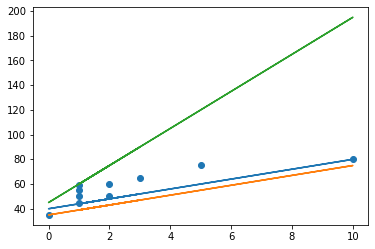

In [5]:
a = 4
b = 40
plt.scatter(X[1,:], y)
plt.plot(X[1,:], a*X[1,:] + b)
plt.plot(X[1,:], 4*X[1,:] + 35)
plt.plot(X[1,:], 15*X[1,:] + 45)

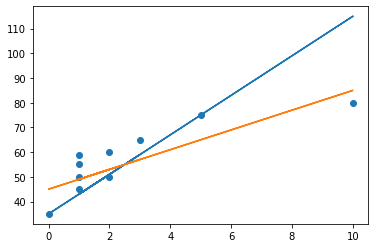

In [6]:
a = 8
b = 35
plt.scatter(X[1,:], y)
# y = a*x + b
plt.plot(X[1, :], a*X[1, :] + b)
plt.plot(X[1, :], 4*X[1, :] + 45)

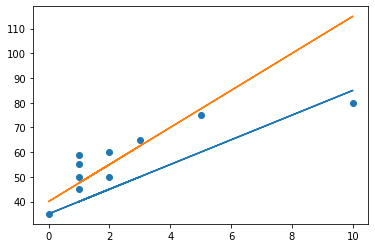

In [7]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [8]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [9]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [10]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

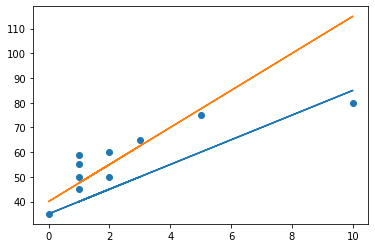

In [11]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [12]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [13]:
err1, err2

(9.4, -2.1)

In [14]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [15]:
mae_1, mae_2

(10.4, 7.9)

In [16]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [17]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [18]:
X.shape

(2, 10)

In [19]:
X.T.shape

(10, 2)

In [20]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

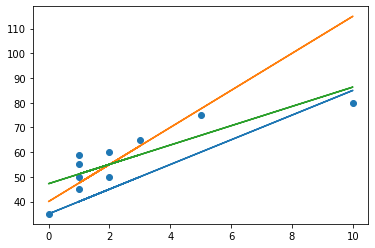

In [21]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [22]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [23]:
calc_mse(y, y_pred1)

143.6

In [24]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [25]:
calc_mae(y, y_pred1)

10.4

In [26]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [27]:
calc_mse(y, y_pred3)

45.93750000000002

In [28]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [29]:
#np.mean(y_pred1 - y)**2
#np.mean(w*x - y)**2
#np.sum(w*x - y)**2 / n
#1/n * np.sum((w*x - y)**2)
#(w*x - y)**2
#
#2*z*z
#
#2*x*(w*x - y) 
#2*x*(w*x - y)

In [30]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [31]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [32]:
W[0] - g


47.2321430605

1. Подберите скорость обучения (alpha) и количество итераций:

In [33]:
n = X.shape[1]
N_ITER = int(60)
START_ALPHA = 0.8
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 1e-08)

In [34]:
%%time
for i in range(N_ITER):
    alpha = START_ALPHA/(i+1)
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % (N_ITER/10) == 0:
        print(i, W, err)
print('final:',i, W, err)


0 [ 89.16 272.5 ] 3173.15
6 [ 547258.42220248 2963394.88494419] 22872733524867.164
12 [ 2705176.57377175 14649439.33757994] 4567167133196605.0
18 [ 23357.21241532 126241.25816224] 3411321308968.6084
24 [46.68332289  4.00851104] 46.26123966935231
30 [46.77352071  3.99540235] 46.05690122026678
36 [46.83614069  3.98383911] 46.02573051213167
42 [46.88258239  3.9752633 ] 46.00581016552016
48 [46.91850981  3.96862903] 45.99222538609884
54 [46.94719858  3.96333143] 45.98250183971526
final: 59 [46.96706546  3.95966285] 45.97634588134738
Wall time: 18.9 ms


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [35]:
n = X.shape[1]
N_ITER = int(60)
START_ALPHA = 0.8
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.013333333333333334)

In [36]:
%%time
for i in range(N_ITER):
    alpha = START_ALPHA/(i+1)
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
      W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    if i % (N_ITER/10) == 0:
        print(i, W, err)
print('final:',i, W, err)

0 [ 89.16 272.5 ] 3173.15
6 [ 547258.42220248 2963394.88494419] 22872733524867.164
12 [ 2705176.57377175 14649439.33757994] 4567167133196605.0
18 [ 23357.21241532 126241.25816224] 3411321308968.6055
24 [46.68332289  4.00851104] 46.26123966815002
30 [46.77352071  3.99540235] 46.05690121943638
36 [46.83614069  3.98383911] 46.02573051151804
42 [46.8825824  3.9752633] 46.00581016504506
48 [46.91850981  3.96862903] 45.99222538571821
54 [46.94719858  3.96333143] 45.982501839402275
final: 59 [46.96706546  3.95966285] 45.976345881077194
Wall time: 18.9 ms


Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [37]:
%%time
tol = 0.001
alpha = tol*10
W = np.array([1, 0.5])

err_0 = float('inf')
y_pred = np.dot(W, X)
err_1 = calc_mse(y, y_pred)
W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
i=0

while err_0 - err_1 > tol:
    i+=1
    y_pred = np.dot(W, X)
    err_0 = err_1
    err_1 = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    if i % (1000) == 0:
        print(i, W, err_1)
print('final:',i, W, err_1)

final: 479 [46.94003874  3.96465355] 45.98434114415108
Wall time: 30.9 ms
